<a href="https://colab.research.google.com/github/raffaelepojer/DeepLearningAssignment/blob/DL_luna/luna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accessing the dataset

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

%cd /content/gdrive/MyDrive/dataset_elisa

Mounted at /content/gdrive
/content/gdrive/MyDrive/dataset_elisa


# Start importing the dataset in pytorch

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd

import os
from torchvision.io import read_image
from torch.utils.data import DataLoader

# Preliminary checks

In [18]:
df = pd.read_csv('annotations_train.csv')
tmp = df.iloc[df.index[df['id'] == 9], 1:]
tmp

,age,backpack,bag,handbag,clothes,down,up,hair,hat,gender,upblack,upwhite,upred,uppurple,upyellow,upgray,upblue,upgreen,downblack,downwhite,downpink,downpurple,downyellow,downgray,downblue,downgreen,downbrown
233,2,1,1,1,2,2,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1


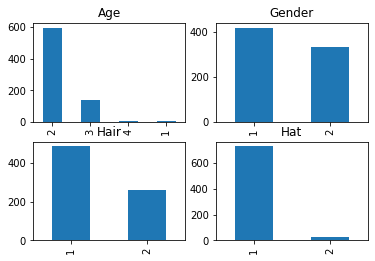

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# Age and gender
df['age'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Age')
df['gender'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Gender')
# Head features
df['hair'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Hair')
df['hat'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Hat')


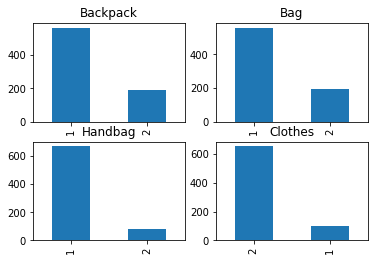

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# General features
df['backpack'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Backpack')
df['bag'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Bag')
df['handbag'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Handbag')
df['clothes'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Clothes')

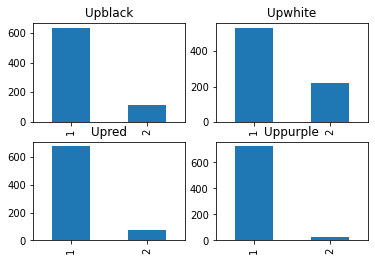

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# Upper clothing color
df['upblack'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Upblack')
df['upwhite'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Upwhite')
df['upred'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Upred')
df['uppurple'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Uppurple')

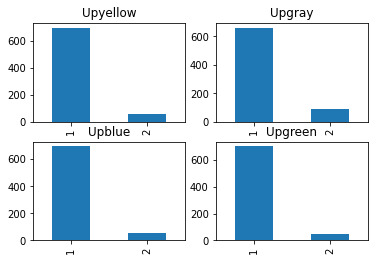

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# Cntd
df['upyellow'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Upyellow')
df['upgray'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Upgray')
df['upblue'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Upblue')
df['upgreen'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Upgreen')

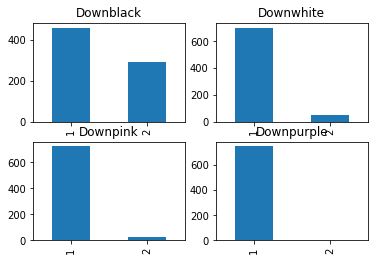

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# Lower clothing color
df['downblack'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Downblack')
df['downwhite'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Downwhite')
df['downpink'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Downpink')
df['downpurple'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Downpurple')

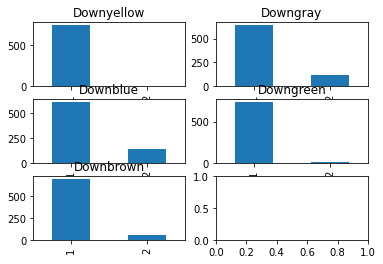

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=2)
# Cntd
df['downyellow'].value_counts().plot(ax=axes[0,0], kind = 'bar', title = 'Downyellow')
df['downgray'].value_counts().plot(ax=axes[0,1], kind = 'bar', title = 'Downgray')
df['downblue'].value_counts().plot(ax=axes[1,0], kind = 'bar', title = 'Downblue')
df['downgreen'].value_counts().plot(ax=axes[1,1], kind = 'bar', title = 'Downgreen')
df['downbrown'].value_counts().plot(ax=axes[2,0], kind = 'bar', title = 'Downbrown')

In [ ]:
class ElyImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir

        self.imgs = os.listdir(img_dir)
        self.img_list = self.imgs

        self.imgs = [el for el in self.imgs if os.path.splitext(el)[1] == '.jpg']
        self.lb_ids = [int(el.split('_')[0]) for el in self.imgs]
        self.lb_cams = [int(el.split('_')[1][1]) for el in self.imgs]
        self.imgs = [os.path.join(img_dir, el) for el in self.imgs]

        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_list[idx])
        image = read_image(img_path)
        id = self.lb_ids[idx]

        label = torch.tensor(self.img_labels.iloc[
                                                  self.img_labels.index[self.img_labels['id'] == self.lb_ids[idx]], 1:].values)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, id, label


In [ ]:
training_data = ElyImageDataset('annotations_train.csv', 'train/')

# Show 4 samples in the dataset

0 torch.Size([3, 128, 64]) 350
1 torch.Size([3, 128, 64]) 1411
2 torch.Size([3, 128, 64]) 959
3 torch.Size([3, 128, 64]) 959


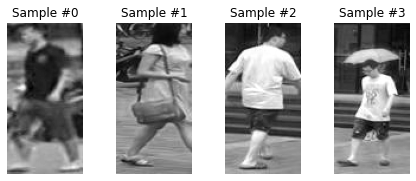

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(len(training_data)):
    image, id, label = training_data[i]

    print(i, image.shape, id)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    plt.imshow(image[0], cmap='gray')

    if i == 3:
        plt.show()
        break

In [ ]:
labels_map = {
    0: {
        1: 'young',
        2: 'teenager',
        3: 'adult',
        4: 'old'
    },
    1: {
        1: 'no backpack',
        2: 'yes backpack'
    },
    2: {
        1: 'no bag',
        2: 'yes bag'
    },
    3: {
        1: 'no handbag',
        2: 'yes handbag'
    },
    4: {
        1: 'dress',
        2: 'pants'
    },
    5: {
        1: 'long lower body clothing',
        2: 'short'
    },
    6: {
        1: 'long sleeve',
        2: 'short sleeve'
    },
    7: {
        1: 'short hair',
        2: 'long hair'
    },
    8: {
        1: 'no hat',
        2: 'yes hat'
    },
    9: {
        1: 'male',
        2: 'female'
    },
    10: {
        1: 'no upblack',
        2: 'yes upblack'
    },
    11: {
        1: 'no upwhite',
        2: 'yes upwhite'
    },
    12: {
        1: 'no upred',
        2: 'yes upred'
    },
    13: {
        1: 'no uppurple',
        2: 'yes uppurple'
    },
    14: {
        1: 'no upyellow',
        2: 'yes upyellow'
    },
    15: {
        1: 'no upgray',
        2: 'yes upgray'
    },
    16: {
        1: 'no upblue',
        2: 'yes upblue'
    },
    17: {
        1: 'no upgreen',
        2: 'yes upgreen'
    },
    18: {
        1: 'no downblack',
        2: 'yes downblack'
    },
    19: {
        1: 'no downwhite',
        2: 'yes downwhite'
    },
    20: {
        1: 'no downpink',
        2: 'yes downpink'
    },
    21: {
        1: 'no downpurple',
        2: 'yes downpurple'
    },
    22: {
        1: 'no downyellow',
        2: 'yes downyellow'
    },
    23: {
        1: 'no downgray',
        2: 'yes downgray'
    },
    24: {
        1: 'no downblue',
        2: 'yes downblue'
    },
    25: {
        1: 'no downgreen',
        2: 'yes downgreen'
    },
    26: {
        1: 'no downbrown',
        2: 'yes downbrown'
    }    
}

# what about multicolor?

Feature batch shape: torch.Size([64, 3, 128, 64])
Labels batch shape: torch.Size([64, 1, 27])


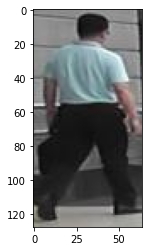

adult
no backpack
no bag
yes handbag
pants
long lower body clothing
short sleeve
short hair
no hat
male
no upblack
yes upwhite
no upred
no uppurple
no upyellow
no upgray
no upblue
no upgreen
yes downblack
no downwhite
no downpink
no downpurple
no downyellow
no downgray
no downblue
no downgreen
no downbrown
Label: tensor([3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1])


In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

train_features, train_ids, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0].squeeze()
plt.imshow(img.permute(1, 2, 0))
plt.show()

for i in range(len(label)):
  print(labels_map[i][label[i].item()])

print(f"Label: {label}")

# Loss/cost function

In [ ]:
def get_cost_function():
  cost_function = torch.nn.CrossEntropyLoss()
  return cost_function

# Optimizer

In [ ]:
def get_optimizer(net, lr, wd, momentum):
  optimizer = torch.optim.SGD(net.parameters(), lr = lr, 
                              weight_decay = wd, momentum = momentum)
  return optimizer

# Train function

In [ ]:
def train(net, data_loader, optimizer, cost_function, device = 'cuda'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.

  net.train()
  for batch_idx, (inputs, targets) in enumerate(data_loader):

    inputs = inputs.to(device)
    targets = targets.to(device)

    # Forward pass
    ouputs = net(inputs)

    # Apply the loss
    loss = cost_function(outputs, targets)

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    # Reset the gradients
    optimizer.sero_grad()

    samples += inputs.shape[0]
    cumulative_loss += loss.item()
    _, predicted = outputs.max(dim = 1)

    cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples, cumulative_accuracy/samples*100

# Wrapping everything up

In [ ]:
def log_values(writer, step, loss, accuracy, prefix):
  writer.add_scalar(f'{prefix}/loss', loss, step)
  writer.add_scalar(f'{prefix}/accuracy', accuracy, step)

def main(batch_size = 128, input_dim = 28*28, hidden_dim = 100, output_dim = 10, device = 'cuda:0', learning_rate = 0.01, weight_decay = 0.000001, momentum = 0.9, epochs = 10):
  from torch.utils.tensorboard import SummaryWriter
  # Creates a logger for the experiment
  writer = SummaryWriter(log_dir = 'runs/exp1')

  # Gets DataLoaders
  train_loader, val_loader, test_loader = get_data(batch_size)

  # Instantiates the network and moves it to the chosen device (GPU)
  net = MyFirstNetwork(input_dim, hidden_dim, output_dim).to(device)

  # Instantiates the optimizer
  optimizer = get_optimizer(net, learning_rate, weight_decay, momentum)

  # Creates the cost function
  cost_function = get_cost_function()

  # Computes evaluation results before training
  print('Before training:')
  train_loss, train_accuracy = test(net, train_loader, cost_function)
  val_loss, val_accuracy = test(net, val_loader, cost_function)
  test_loss, test_accuracy = test(net, test_loader, cost_function)

  # Logs to TensorBoard
  log_values(writer, -1, train_loss, train_accuracy, 'Train')
  log_values(writer, -1, val_loss, val_accuracy, 'Validation')
  log_values(writer, -1, test_loss, test_accuracy, 'Test')

  print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
  print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
  print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
  print('----------------------------------------------------------------------------')

  # For each epoch, train the network and then compute evaluation results
  for e in range(epochs):
    train_loss, train_accuracy = train(net, train_loader, optimizer, cost_function)
    val_loss, val_accuracy = test(net, val_loader, cost_function)

    # Logs to TensorBoard
    log_values(writer, e, val_loss, val_accuracy, 'Validation')

    print('Epoch: {:d}'.format(e+1))
    print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
    print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
    print('-----------------------------------------------------')

  # Compute final evaluation results
  print('After training')
  train_loss, train_accuracy = test(net, train_loader, cost_function)
  val_loss, val_accuracy = test(net, val_loader, cost_function)
  test_loss, test_accuracy = test(net, test_loader, cost_function)

  # Logs to TensorBoard
  log_values(writer, epochs, train_loss, train_accuracy, 'Train')
  log_values(writer, epochs, val_loss, val_accuracy, 'Validation')
  log_values(writer, epochs, test_loss, test_accuracy, 'Test')

  print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
  print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
  print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
  print('-----------------------------------------------------')

  # Closes the logger 
  writer.close()

